In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

<h3>Reading the Dataset</h3>

In [2]:
df=pd.read_csv('Iris.csv')

In [16]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

<h3>Data Preprocessing</h3>

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h3>Exploratory Data Analysis</h3>

In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


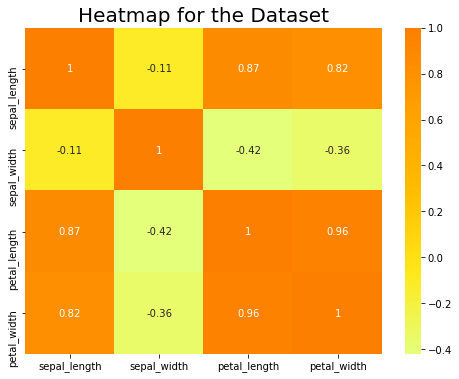

In [21]:
rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),annot=True,cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

In [26]:
df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [28]:
df['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [30]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


<h4>We can observe that some features are highly correlated with one another.</h4>

<h3>Data Visualization</h3>

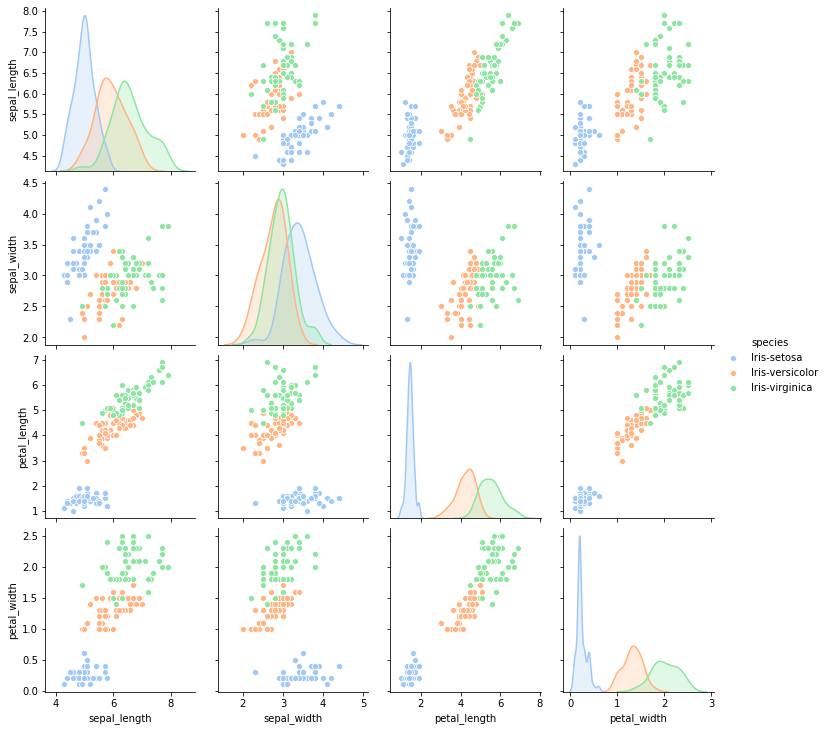

In [32]:
sns.pairplot(df,hue ='species',palette='pastel')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001812A8E07F0>,
      dtype=object)

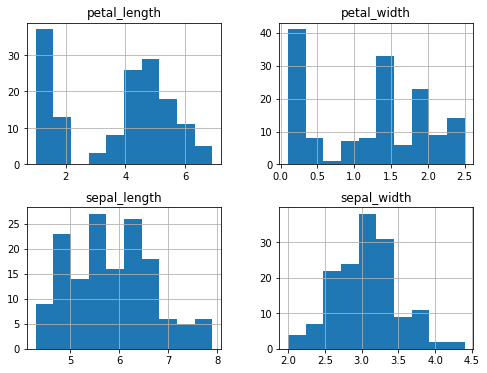

In [33]:
df.hist(figsize=(8,6))

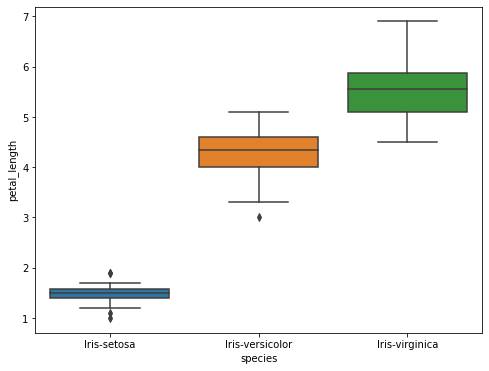

In [47]:
sns.boxplot(y=df['petal_length'],x=df['species'],data=df)

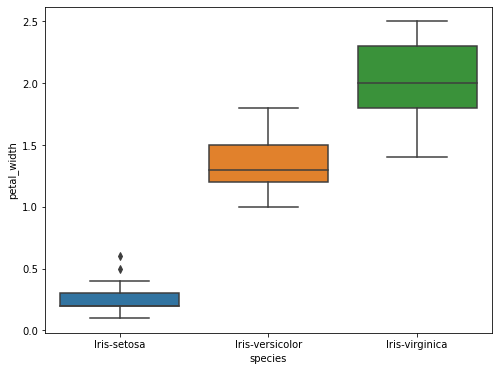

In [48]:
sns.boxplot(y=df['petal_width'],x=df['species'],data=df)

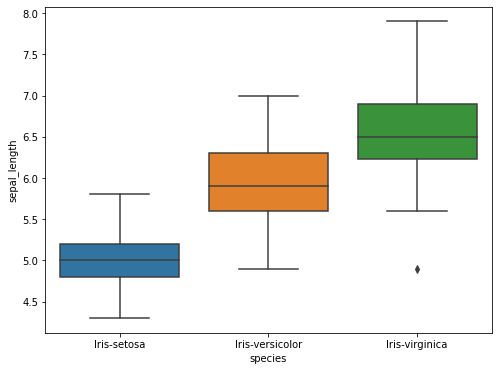

In [49]:
sns.boxplot(y=df['sepal_length'],x=df['species'],data=df)

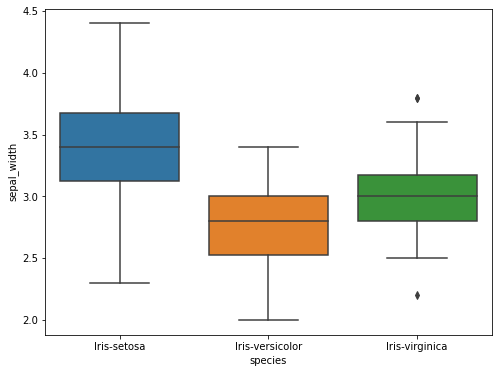

In [50]:
sns.boxplot(y=df['sepal_width'],x=df['species'],data=df)

<h3>Classification Models</h3>

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [57]:
y = df['species']
X = df.drop(['species'], axis = 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

<h3>LOGISTIC REGRESSION</h>

In [62]:
lr=LogisticRegression()

In [63]:
lr.fit(X_train,y_train)

LogisticRegression()

In [65]:
lryhat=lr.predict(X_test)

In [66]:
classification_report(lryhat,y_test)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        16\nIris-versicolor       0.94      1.00      0.97        17\n Iris-virginica       1.00      0.92      0.96        12\n\n       accuracy                           0.98        45\n      macro avg       0.98      0.97      0.98        45\n   weighted avg       0.98      0.98      0.98        45\n'

In [68]:
confusion_matrix(lryhat,y_test)


array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]], dtype=int64)

In [69]:
accuracy_score(lryhat,y_test)

0.9777777777777777

<h5>ACCURACY OBTAINED IS 97.77%</h5>

<h3>SUPPORT VECTOR MACHINES</h3>

In [95]:
cl=SVC(kernel='linear')

In [96]:
cl.fit(X_train,y_train)

SVC(kernel='linear')

In [97]:
clyhat=cl.predict(X_test)

In [98]:
classification_report(clyhat,y_test)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        16\nIris-versicolor       0.94      1.00      0.97        17\n Iris-virginica       1.00      0.92      0.96        12\n\n       accuracy                           0.98        45\n      macro avg       0.98      0.97      0.98        45\n   weighted avg       0.98      0.98      0.98        45\n'

In [99]:
confusion_matrix(clyhat,y_test)

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]], dtype=int64)

In [100]:
accuracy_score(clyhat,y_test)

0.9777777777777777

<h5>ACCURACY OBTAINED IS 97.77%</h5>

<h3>DECISION TREE</h3>

In [101]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [103]:
dtcyhat=dtc.predict(X_test)

In [104]:
classification_report(dtcyhat,y_test)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        16\nIris-versicolor       0.94      1.00      0.97        17\n Iris-virginica       1.00      0.92      0.96        12\n\n       accuracy                           0.98        45\n      macro avg       0.98      0.97      0.98        45\n   weighted avg       0.98      0.98      0.98        45\n'

In [105]:
accuracy_score(dtcyhat,y_test)

0.9777777777777777

<h5>ACCURACY OBTAINED IS 97.77%</h5>

<h3>KNN MODEL</h3>

In [117]:
knn = KNeighborsClassifier(n_neighbors =12)  # n_neighbors means k
knn.fit(X_train, y_train)
knnyhat = knn.predict(X_test)

In [118]:
accuracy_score(knnyhat,y_test)

0.9777777777777777

<h5>ACCURACY OBTAINED IS 97.77%</h5>

<h3>NAIVE BAYES</h3>

In [115]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [116]:
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


<h5>ACCURACY OBTAINED IS 100%</h5>

<h3>XGBOOST</h3>

In [123]:
model=XGBClassifier()

In [124]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
modelyhat=model.predict(X_test)

In [126]:
accuracy_score(modelyhat,y_test)

0.9777777777777777

<h5>ACCURACY OBTAINED IS 97.77%</h5>

<h3>CONCLUSION</h3>

We see that the highest accuracy is achieved by Naive Bayes Algorithm.